<a href="https://colab.research.google.com/github/jeonbyeongguk/cuckoobee/blob/main/cuckoobee/AIbootcamp/Project/%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%87%BC%ED%95%91_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B0%90%EC%84%B1_%EB%B6%84%EC%84%9D_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 초기설정

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 27.68 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 39.8 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-02-07 04:24:28--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00:

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,228 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
#mpl.font_manager._rebuild()

# https://pinkwink.kr/1255 / https://teddylee777.github.io/colab/colab-korean 한글 문제 대응 참고

fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:

# 오류(SettingWithCopyError 발생)
pd.set_option('mode.chained_assignment', 'raise') # SettingWithCopyError

# 경고(SettingWithCopyWarning 발생, 기본 값입니다)
pd.set_option('mode.chained_assignment', 'warn') # SettingWithCopyWarning

# 무시
pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다

### 데이터 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_table('/content/drive/MyDrive/colab_data/review.txt', names=['ratings', 'reviews'])
df

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


#### 중복 데이터가 있다면 제거

In [ ]:
df.drop_duplicates('reviews',keep='first')
df.shape

(200000, 2)

#### 훈련, 테스트셋 분리

In [ ]:
train, val = train_test_split(df, test_size = 0.2, random_state = 11)
train.shape, val.shape

((160000, 2), (40000, 2))

In [ ]:
val, test = train_test_split(val, test_size = 0.5, random_state = 11)
val.shape, test.shape

((20000, 2), (20000, 2))

#### 별점으로 라벨링 : 별점이 4을 넘으면 긍정 리뷰, 이하는 부정 리뷰로 분류

In [ ]:
def star_evaluate(rating):
  if rating >=4:
    return 1
  else:
    return 0
  
train['label'] = train['ratings'].apply(star_evaluate)
val['label'] = val['ratings'].apply(star_evaluate)
train

,ratings,reviews,label
6173,5,머리끝이 많이 갈라져서 구매했습니다. 이미 갈라진 건 어쩔 수 없지만 뭔가 모발이 ...,1
62572,4,"가방사이즈 딱 적절해서 좋고, 탄탄한 느낌이라 좋네요. 다만 새것 냄새가 2일째 빠...",1
102317,2,생각보다 짧아요 ㅠ,0
122006,2,별로따뜻하지도않고..벨브도돌리다밑에캡이빠져버리네여..ㅡㅡ그래서본드로붙였는데..노즐만...,0
111083,1,마스크는소형인데끈이대형이네요ㅎ 그것도 쉽게 끊어져요ㅜ,0
...,...,...,...
102327,1,완전 잘깨져요 이건 뭐 잠깐 바닥에 스치기만해도 깨져있어요,0
97617,2,바코드안떳어요,0
21584,2,네조아요. 필요해서 샀어요,0
36543,5,발열 엄청 오래 지속되고 냄새도 없고 만족합니다,1


In [ ]:
train['label'].value_counts()

0    80157
1    79843
Name: label, dtype: int64

#### 데이터 정제 - 훈련, 테스트셋에 모두 적용 -> 정규표현식 사용하여 한글 제외 모두 제거

In [ ]:
train['reviews'] = train['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train['reviews'].replace('', np.nan, inplace=True)
train.head()

<ipython-input-155-cc12ed3edeef>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['reviews'] = train['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,ratings,reviews,label
6173,5,머리끝이 많이 갈라져서 구매했습니다 이미 갈라진 건 어쩔 수 없지만 뭔가 모발이 더...,1
62572,4,가방사이즈 딱 적절해서 좋고 탄탄한 느낌이라 좋네요 다만 새것 냄새가 일째 빠지지 ...,1
102317,2,생각보다 짧아요 ㅠ,0
122006,2,별로따뜻하지도않고벨브도돌리다밑에캡이빠져버리네여ㅡㅡ그래서본드로붙였는데노즐만새로사야할듯...,0
111083,1,마스크는소형인데끈이대형이네요ㅎ 그것도 쉽게 끊어져요ㅜ,0


In [ ]:
val['reviews'] = val['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
val['reviews'].replace('', np.nan, inplace=True)
val.head()

<ipython-input-156-35de4fbe55ca>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  val['reviews'] = val['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,ratings,reviews,label
109140,5,배송빠르고 맘에들어요 재구매예정이요,1
56882,5,재구매 배터리가 오래가네요,1
195983,2,귀퉁이 베어링이 다른거라 무게균형이안맞아서 얼마 안돌아갑니다 불만,0
90903,1,바지 박음질 다 뜯어져서 하루 세탁에 첫날 착용에 제대로 입지 못했어요 바지 박음질...,0
181836,5,신경써서 잘배송해주셨어요 감사해요 이쁘게 잘 쓸게용,1


In [ ]:
test['reviews'] = test['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test['reviews'].replace('', np.nan, inplace=True)
test.head()

<ipython-input-157-79275fc87b23>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test['reviews'] = test['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,ratings,reviews
87893,4,생각보다 착용시 줄편하네요
121329,5,배송도 빠르구 향도 너무 좋고 무엇보다 사슴이 너무너무 예뻐요 아빠 선물로 드렸는데...
5782,2,배송이 무지 늦어요
124683,2,더운 날씨이긴하나 음식인데 따뜻하게 와서
187665,5,아직 관심은 없는듯 하지만 계속 쥐어주고있어요


### 토큰화 - Okt

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
stopwords = ['요', '도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
train['tokenized'] = train['reviews'].apply(okt.morphs)
train['tokenized'] = train['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
val['tokenized'] = val['reviews'].apply(okt.morphs)
val['tokenized'] = val['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
train.head()

,ratings,reviews,label,tokenized
6173,5,머리끝이 많이 갈라져서 구매했습니다 이미 갈라진 건 어쩔 수 없지만 뭔가 모발이 더...,1,"[머리, 끝, 많이, 갈라져서, 구매, 했습니다, 이미, 갈라진, 건, 어쩔, 수,..."
62572,4,가방사이즈 딱 적절해서 좋고 탄탄한 느낌이라 좋네요 다만 새것 냄새가 일째 빠지지 ...,1,"[가방, 사이즈, 딱, 적절해서, 좋고, 탄탄한, 느낌, 이라, 좋네요, 다만, 새..."
102317,2,생각보다 짧아요 ㅠ,0,"[생각, 보다, 짧아요, ㅠ]"
122006,2,별로따뜻하지도않고벨브도돌리다밑에캡이빠져버리네여ㅡㅡ그래서본드로붙였는데노즐만새로사야할듯...,0,"[별로, 따뜻하지도, 않고, 벨브, 돌리다, 밑, 캡, 빠져, 버리네, 여, ㅡㅡ,..."
111083,1,마스크는소형인데끈이대형이네요ㅎ 그것도 쉽게 끊어져요ㅜ,0,"[마스크, 소형, 인데, 끈, 이대형, 이네, ㅎ, 그것, 쉽게, 끊어져요, ㅜ]"


#### 단어 빈도에 따른 시각화 - Counter, Wordcloud 패키지 이용

In [ ]:
negative_words = np.hstack(train[train.label == 0]['tokenized'].values)
positive_words = np.hstack(train[train.label == 1]['tokenized'].values)

In [ ]:
nw = Counter(negative_words)
print(nw.most_common(20))

[('너무', 14161), ('안', 12449), ('배송', 9771), ('그냥', 9085), ('잘', 8416), ('로', 6177), ('했는데', 5988), ('별로', 5967), ('못', 5485), ('제품', 5419), ('으로', 5306), ('생각', 5276), ('좀', 5217), ('ㅠㅠ', 5191), ('사용', 5173), ('하고', 5035), ('보다', 4934), ('구매', 4878), ('만', 4227), ('맛', 4210)]


In [ ]:
nwc = nw.most_common(15)

In [ ]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


{'너무': 14161, '안': 12449, '배송': 9771, '그냥': 9085, '잘': 8416, '로': 6177, '했는데': 5988, '별로': 5967, '못': 5485, '제품': 5419, '으로': 5306, '생각': 5276, '좀': 5217, 'ㅠㅠ': 5191, '사용': 5173}


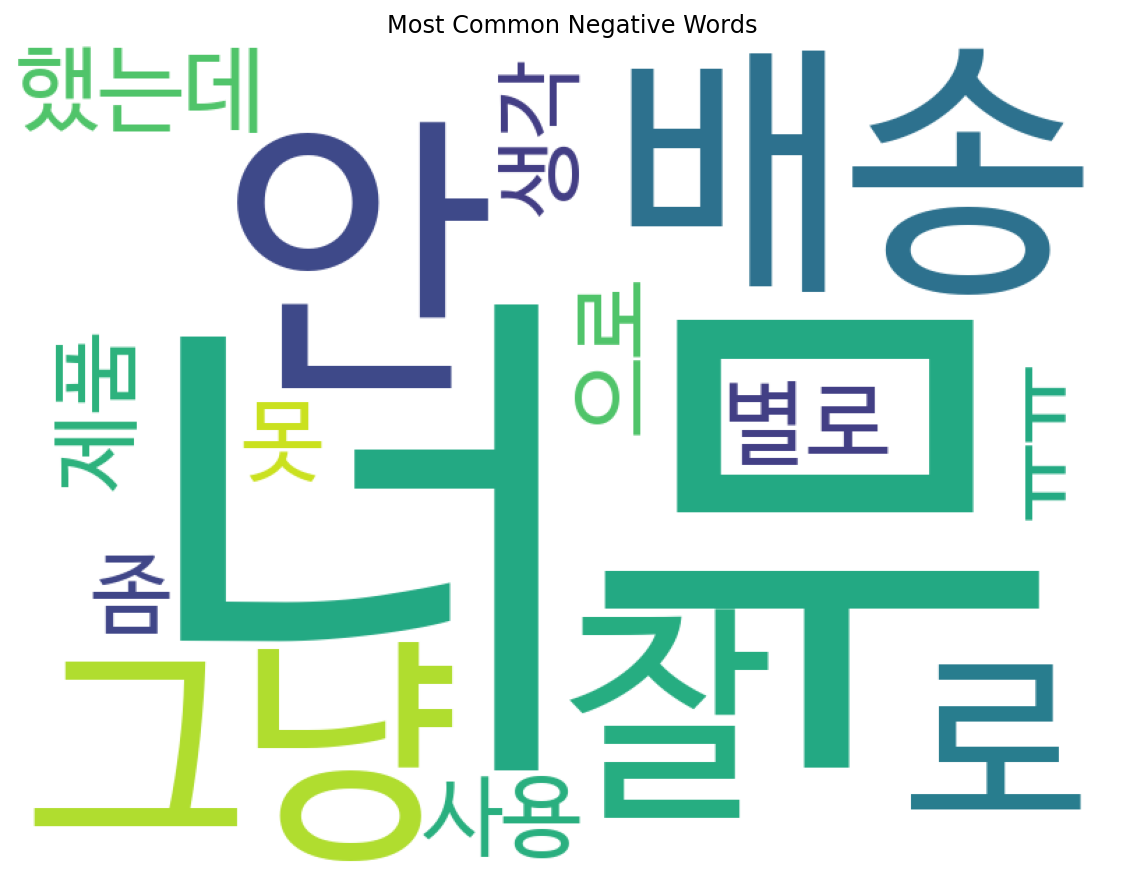

In [ ]:
from wordcloud import WordCloud

#wordCloud생성
#한글꺠지는 문제 해결하기위해 font_path 지정
negative_word_cloud = WordCloud(font_path=fontpath, 
               background_color='white', width=800, height=600)
print(dict(nwc))
cloud = negative_word_cloud.generate_from_frequencies(dict(nwc))
plt.figure(figsize=(10, 8))
plt.title('Most Common Negative Words')
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
pw = Counter(positive_words)
print(pw.most_common(20))

[('잘', 16320), ('좋아요', 15337), ('배송', 12884), ('너무', 9712), ('재구매', 9184), ('구매', 7629), ('사용', 5850), ('가격', 5346), ('같아요', 4747), ('으로', 4682), ('로', 4661), ('좋네요', 4471), ('제품', 4228), ('보다', 4209), ('빠르고', 4190), ('주문', 4070), ('입니다', 4007), ('생각', 3702), ('더', 3548), ('좋습니다', 3541)]


In [ ]:
pwc = pw.most_common(15)

{'잘': 16320, '좋아요': 15337, '배송': 12884, '너무': 9712, '재구매': 9184, '구매': 7629, '사용': 5850, '가격': 5346, '같아요': 4747, '으로': 4682, '로': 4661, '좋네요': 4471, '제품': 4228, '보다': 4209, '빠르고': 4190}


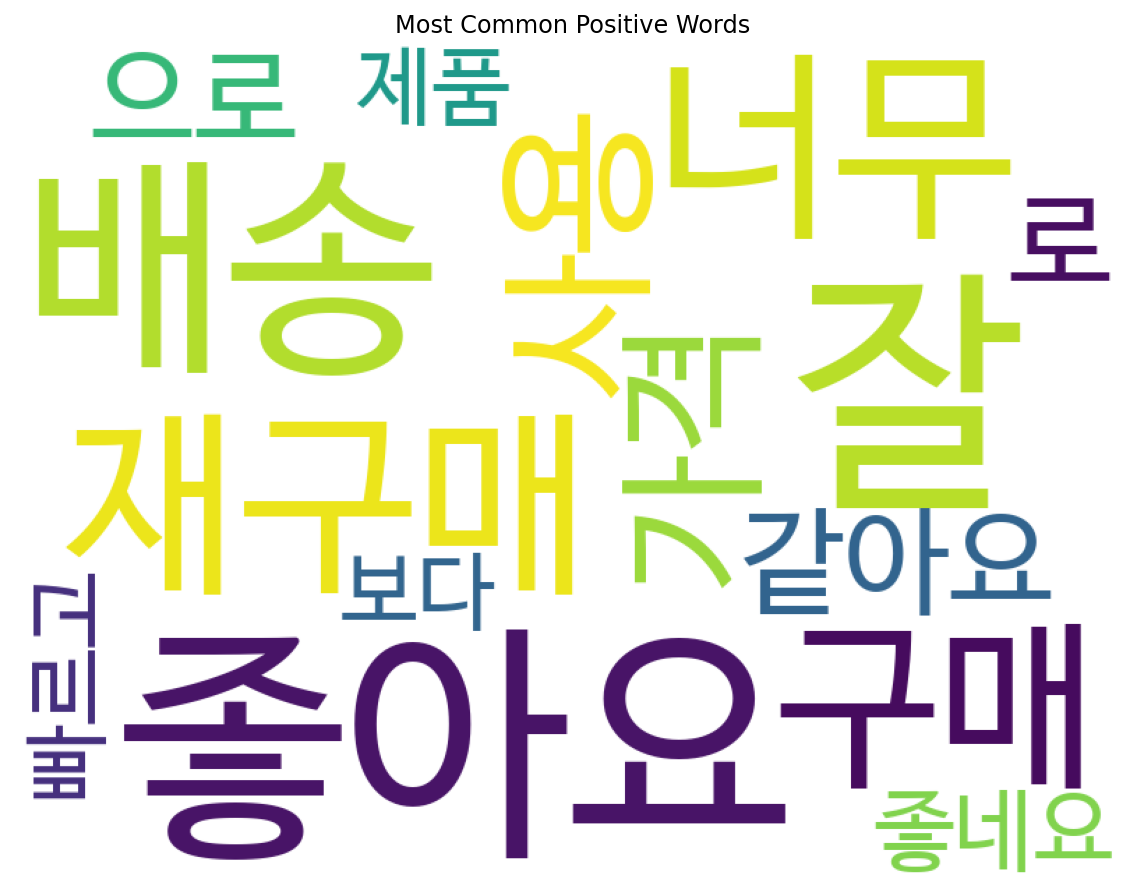

In [ ]:
positive_word_cloud = WordCloud(font_path=fontpath, 
               background_color='white', width=800, height=600)
print(dict(pwc))
cloud = positive_word_cloud.generate_from_frequencies(dict(pwc))
plt.figure(figsize=(10, 8))
plt.title('Most Common Positive Words')
plt.axis('off')
plt.imshow(cloud)
plt.show()

#### 데이터에 정수 인코딩

In [ ]:
X_train = train['tokenized']
y_train = train['label']
X_val= val['tokenized']
y_val = val['label']

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) 
rare_cnt = 0 
total_freq = 0 
rare_freq = 0 

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 97950
등장 빈도가 1번 이하인 희귀 단어의 수: 54340
단어 집합에서 희귀 단어의 비율: 55.47728432873915
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.757317496432841


In [ ]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 43612


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_val= tokenizer.texts_to_sequences(X_val)

리뷰의 최대 길이 : 59
리뷰의 평균 길이 : 12.317225


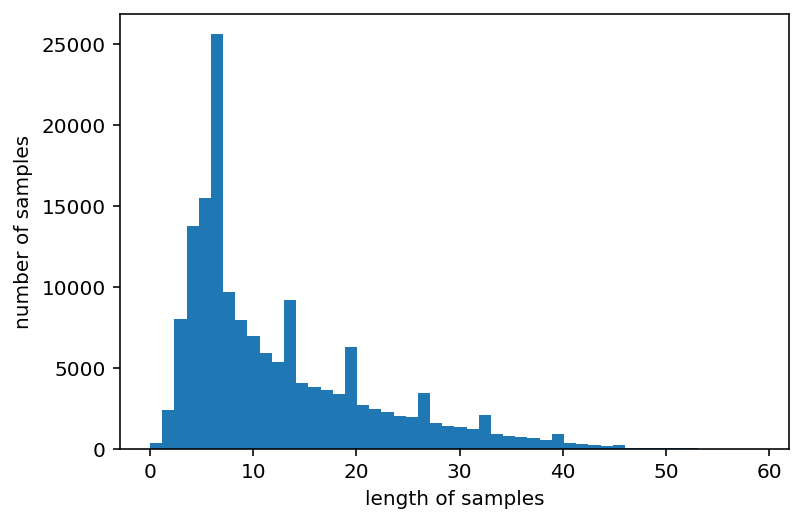

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len = 80 #Padding 80으로
X_train = pad_sequences(X_train, maxlen = max_len)
X_val = pad_sequences(X_val, maxlen = max_len)


#### GRU 모델을 이용한 감성 분석

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='relu'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         4361200   
                                                                 
 gru_2 (GRU)                 (None, 128)               88320     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,449,649
Trainable params: 4,449,649
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
2130/2134 [============================>.] - ETA: 0s - loss: 0.5022 - acc: 0.8730
Epoch 1: val_acc improved from -inf to 0.90084, saving model to best_model.h5
2134/2134 [==============================] - 37s 13ms/step - loss: 0.5019 - acc: 0.8731 - val_loss: 0.4746 - val_acc: 0.9008
Epoch 2/15
2131/2134 [============================>.] - ETA: 0s - loss: 0.4162 - acc: 0.9033
Epoch 2: val_acc did not improve from 0.90084
2134/2134 [==============================] - 22s 10ms/step - loss: 0.4160 - acc: 0.9033 - val_loss: 0.3723 - val_acc: 0.8931
Epoch 3/15
2132/2134 [============================>.] - ETA: 0s - loss: 0.3872 - acc: 0.9172
Epoch 3: val_acc improved from 0.90084 to 0.91291, saving model to best_model.h5
2134/2134 [==============================] - 23s 11ms/step - loss: 0.3873 - acc: 0.9171 - val_loss: 0.3448 - val_acc: 0.9129
Epoch 4/15
2134/2134 [==============================] - ETA: 0s - loss: 0.3509 - acc: 0.9265
Epoch 4: val_acc did not improve from 0.91291
21

#### LSTM 모델을 이용한 감성 분석

In [ ]:
from tensorflow.keras.layers import LSTM, Bidirectional

model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, 100))
model_lstm.add(LSTM(100)) #Bidirectional drop
model_lstm.add(Dense(1, activation='relu')) #activation = sigmoid -> relu

In [ ]:
model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         4361200   
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,441,701
Trainable params: 4,441,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es_lstm = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc_lstm = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
2132/2134 [============================>.] - ETA: 0s - loss: 0.2885 - acc: 0.9476
Epoch 1: val_acc did not improve from 0.91556
2134/2134 [==============================] - 25s 12ms/step - loss: 0.2886 - acc: 0.9475 - val_loss: 0.3903 - val_acc: 0.9103
Epoch 2/15
2132/2134 [============================>.] - ETA: 0s - loss: 0.2813 - acc: 0.9510
Epoch 2: val_acc did not improve from 0.91556
2134/2134 [==============================] - 22s 10ms/step - loss: 0.2813 - acc: 0.9510 - val_loss: 0.5260 - val_acc: 0.9091
Epoch 3/15
2130/2134 [============================>.] - ETA: 0s - loss: 0.2775 - acc: 0.9543
Epoch 3: val_acc did not improve from 0.91556
2134/2134 [==============================] - 23s 11ms/step - loss: 0.2772 - acc: 0.9544 - val_loss: 0.6041 - val_acc: 0.9094
Epoch 4/15
2132/2134 [============================>.] - ETA: 0s - loss: 0.2840 - acc: 0.9564
Epoch 4: val_acc did not improve from 0.91556
2134/2134 [==============================] - 23s 11ms/step - loss: 0.

In [ ]:
y_pred = model_lstm.predict(X_val)

625/625 [==============================] - 3s 3ms/step


### 모델 예측

In [ ]:
print(val['reviews'])

109140                                  배송빠르고 맘에들어요 재구매예정이요
56882                                        재구매 배터리가 오래가네요
195983                 귀퉁이 베어링이 다른거라 무게균형이안맞아서 얼마 안돌아갑니다 불만
90903     바지 박음질 다 뜯어져서 하루 세탁에 첫날 착용에 제대로 입지 못했어요 바지 박음질...
181836                         신경써서 잘배송해주셨어요 감사해요 이쁘게 잘 쓸게용
                                ...                        
180486                      예쁘고 커서 맘에 듭니다 좋은날 맥주따라서 마시고 싶네요
603       새우철이라서 집에서 소금구이 해먹고 싶어서 구입하게 되었는데 너무좋고 편하네요 정말...
170454                                           화면상 사진과같아요
10733                     키즈는 세트치약포함 베이지는 칫솔만 치약은 제조일자가년 ㅠㅠ
90340                                            안밀리고 딱 돟아요
Name: reviews, Length: 20000, dtype: object


> GRU



In [ ]:
def sentiment_predict_gru(sentence):
  sentence = okt.morphs(sentence) # 토큰화
  sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [ ]:
sentiment_predict_gru('아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 엉성하긴 하지만 편하고 가성비 최고예요.')

1/1 [==============================] - 0s 439ms/step
181.36% 확률로 긍정 리뷰입니다.


In [ ]:
sentiment_predict_gru('촉감도 좋고 무게감이나 핏도 편합니다')

1/1 [==============================] - 0s 20ms/step
145.15% 확률로 긍정 리뷰입니다.


In [ ]:
sentiment_predict_gru('비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적으로 보였는데 생각보다 진짜 별로입니다.')

1/1 [==============================] - 0s 20ms/step
100.00% 확률로 부정 리뷰입니다.


In [ ]:
sentiment_predict_gru('저렴해서 구매 했지만 바지 완성도 떨어짐~~^^;')

1/1 [==============================] - 0s 24ms/step
100.00% 확률로 부정 리뷰입니다.


> LSTM

In [ ]:
def sentiment_predict_lstm(sentence):
  sentence = okt.morphs(sentence) # 토큰화
  sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(model_lstm.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [ ]:
sentiment_predict_lstm('아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 엉성하긴 하지만 편하고 가성비 최고예요.')

1/1 [==============================] - 1s 544ms/step
100.00% 확률로 부정 리뷰입니다.


In [ ]:
sentiment_predict_lstm('촉감도 좋고 무게감이나 핏도 편합니다')

1/1 [==============================] - 0s 24ms/step
99.98% 확률로 부정 리뷰입니다.


In [ ]:
sentiment_predict_lstm('비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적으로 보였는데 생각보다 진짜 별로입니다.')

1/1 [==============================] - 0s 21ms/step
100.00% 확률로 부정 리뷰입니다.


In [ ]:
sentiment_predict_lstm('저렴해서 구매 했지만 바지 완성도 떨어짐~~^^;')

1/1 [==============================] - 0s 21ms/step
100.00% 확률로 부정 리뷰입니다.
